In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage import morphology,feature

img = cv2.imread('test_003.png')
plt.imshow(img)
plt.title('Input Image')
plt.show()

print(img.shape)

<Figure size 640x480 with 1 Axes>

(534, 545, 3)


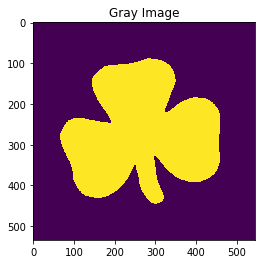

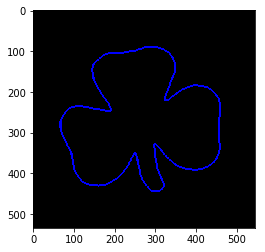

Max Distance 81.98780397107853
min Distance 0.0
10.248475496384817
1


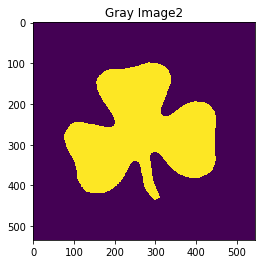

2


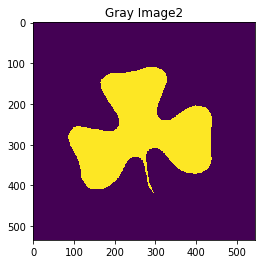

3


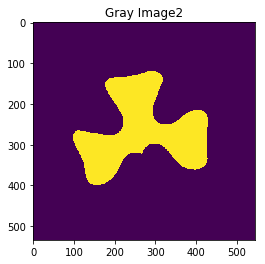

4


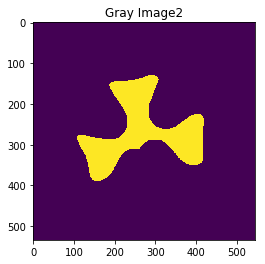

5


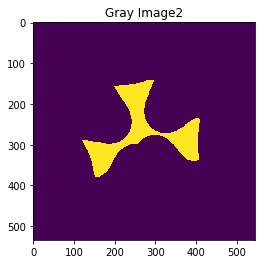

6


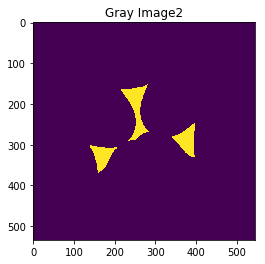

7


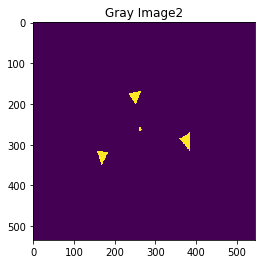

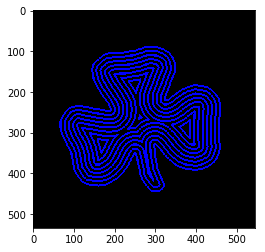

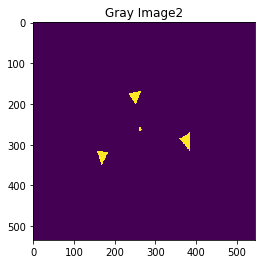

In [31]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,gray_inv = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)
plt.imshow(gray_inv)
plt.title('Gray Image')
plt.show()

distance = ndi.distance_transform_edt(gray_inv)
#print("EDT shape",distance.shape,"\n")
#print(distance,"\n")

lenght = distance.shape[0]
width = distance.shape[1]

contours, hierarchy = cv2.findContours(gray_inv,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[0]
canvas = np.zeros((gray_inv.shape[0],gray_inv.shape[1],3),np.uint8)
#print(cnt)

cv2.polylines(canvas,[cnt],True,(0,0,255),4)
plt.imshow(canvas)
plt.show()


Max = np.max(distance)
Min = np.min(distance)

print("Max Distance",Max)
print("min Distance",Min)

Times = 8
Interval = (Max-Min)/Times
print(Interval)

a = 1
while (Interval*a < Max):
  for y in range (lenght):
     for x in range (width):
        if(distance[y][x]< Interval*a):
           gray_inv[y][x]=0
  
  contours, hierarchy = cv2.findContours(gray_inv,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
  cnt = contours[0]
  cv2.polylines(canvas,[cnt],True,(0,0,255),4)
  if(a==6):
     cnt = contours[1]   
     cv2.polylines(canvas,[cnt],True,(0,0,255),4)
     cnt = contours[2]
     cv2.polylines(canvas,[cnt],True,(0,0,255),4)
  elif(a==7):   
     cnt = contours[1]   
     cv2.polylines(canvas,[cnt],True,(0,0,255),4)
     cnt = contours[2]
     cv2.polylines(canvas,[cnt],True,(0,0,255),4)
     cnt = contours[3]   
     cv2.polylines(canvas,[cnt],True,(0,0,255),4)
     
        
  print(a)
  plt.imshow(gray_inv)
  plt.title('Gray Image2')
  plt.show()
  
  a+=1
   
plt.imshow(canvas)
plt.show()

plt.imshow(gray_inv)
plt.title('Gray Image2')
plt.show()


